## Predictions: Regression for Car Mileage and Diamond Price


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/CarsnDiamonds.png" width="50%">


## __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li><a href="#Datasets">Datasets</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
        </ol>
    </li>
    <li>
        <a href="#Examples">Examples</a>
        <ol>
            <li><a href="#Task-1---Load-the-data-in-a-csv-file-into-a-dataframe">Task 1 - Load the data in a csv file into a dataframe</a></li>
    <li><a href="#Task-2---Identify-the-target-column-and-the-data-columns">Task 2 - Identify the target column and the data columns</a></li>
    <li><a href="#Task-3---Build-and-Train-a-Linear-Regression-Model">Task 3 - Build and Train a Linear Regression Model</a></li>
    <li><a href="#Task-4---Evaluate-the-model-and-make-predictions">Task 4 - Evaluate the model and make predictions</a></li>        </ol>
    </li>
    


<li><a href="#Exercises">Exercises</a></li>
<ol>
    <li><a href="#Exercise-1---Loading-a-dataset-(diamond-dataset)">Exercise 1 - Loading a dataset (diamond dataset)</a></li>
    <li><a href="#Exercise-2---Identify-the-target-column-and-the-data-columns">Exercise 2 - Identify the target column and the data columns</a></li>
    <li><a href="#Exercise-3---Build-and-Train-a-new-Linear-Regression-Model">Exercise 3 - Build and Train a new Linear Regression Model</a></li>
    <li><a href="#Exercise-4---Evaluate-the-model">Exercise 4 - Evaluate the model</a></li>
    <li><a href="#Exercise-5---Predict-the-price-of-a-diamond">Exercise 5 - Predict the price of a diamond</a></li>
    </ol>
</ol>




## Objectives

After completing this lab you will be able to:

 - Use Pandas to load data sets.
 - Identify the target and features.
 - Use Linear Regression to build a model to predict car mileage.
 - Use metrics to evaluate the model.
 - Make predictions using a trained model.


## Datasets

In this lab you will be using dataset(s):

 - Modified version of car mileage dataset. Available at https://archive.ics.uci.edu/ml/datasets/auto+mpg 
 - Modified version of diamonds dataset. Available at https://www.openml.org/search?type=data&sort=runs&id=42225&status=active
 


----


## Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.


### Installing Required Libraries

The following required libraries are pre-installed in the Skills Network Labs environment. However, if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda), you will need to install these libraries by removing the `#` sign before `!pip` in the code cell below.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
!pip install pandas==1.3.4
!pip install scikit-learn==1.0.2
!pip install numpy==1.21.6

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 74.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 55.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 33.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.20.1
    Uninstalling scikit-learn-0.20.1:
      Successfully uninstalled scikit-learn-0.20.1


In [ ]:
# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

### Importing Required Libraries


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Task 1 - Load the data in a csv file into a dataframe


In [3]:
# the data set is available at the url below.
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/datasets/mpg.csv"

# using the read_csv function in the pandas library, we load the data into a dataframe.

df = pd.read_csv(URL)

Let's look at some sample rows from the dataset we loaded:


In [4]:
# show 5 random rows from the dataset
df.sample(5)

,MPG,Cylinders,Engine Disp,Horsepower,Weight,Accelerate,Year,Origin
106,11.0,8,350.0,180,3664,11.0,73,American
125,16.0,6,258.0,110,3632,18.0,74,American
57,15.0,8,304.0,150,3892,12.5,72,American
75,26.0,4,96.0,69,2189,18.0,72,European
27,27.0,4,97.0,88,2130,14.5,70,Japanese


Let's find out the number of rows and columns in the dataset:


In [5]:
df.shape

(392, 8)

Let's create a scatter plot of Horsepower versus mileage(MPG) . This will help us visualize the relationship between them.


<AxesSubplot:xlabel='Horsepower', ylabel='MPG'>

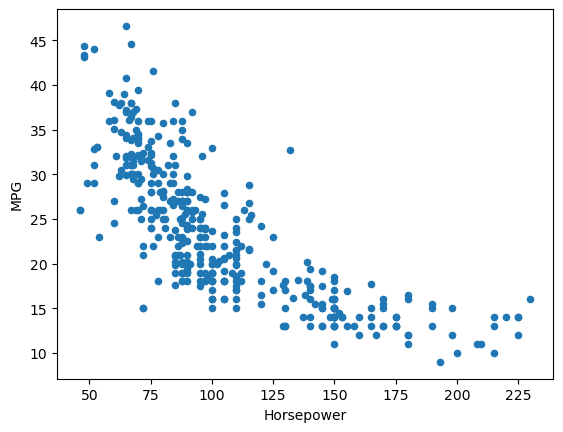

In [6]:
df.plot.scatter(x = "Horsepower", y = "MPG")

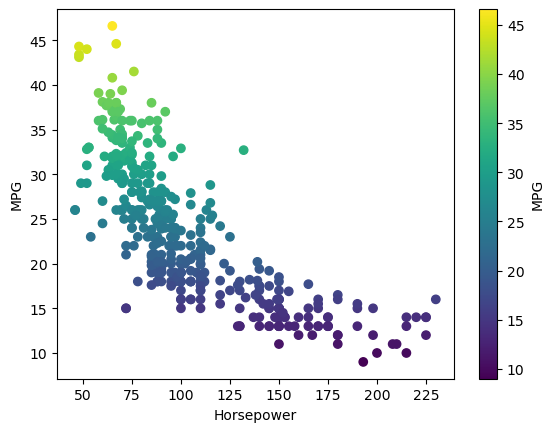

In [9]:
color_gradient = df['MPG']
plt.scatter(x=df['Horsepower'], y=df['MPG'], c=color_gradient, cmap='viridis')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.colorbar(label='MPG')
plt.show()

You are encouraged to create more plots to visualize relationships amongst other columns


## Task 2 - Identify the target column and the data columns


First we identify the target. Target is the value that our machine learning model needs to predict


In [10]:
target = df["MPG"]

We identify the features next. Features are the values our machine learning model learns from


In [11]:
features = df[["Horsepower","Weight"]]

## Task 3 - Build and Train a Linear Regression Model


Create a LR model


In [12]:
lr = LinearRegression()

Train/Fit the model


In [13]:
lr.fit(features,target)

LinearRegression()

## Task 4 - Evaluate the model and make predictions


Your model is now trained. Time to evaluate the model.


In [14]:
#Higher the score, better the model.
lr.score(features,target)

0.7063752737298348

Make predictions. Let us predict the mileage for a car with HorsePower = 100 and Weight = 2000


In [15]:
lr.predict([[100,2000]])

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([29.3216098])

In [16]:
# 29.3216098 miles per gallon is the mileage of a car with HorsePower = 100 and Weight = 2000

# Exercises


In [17]:
URL2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/datasets/diamonds.csv"

### Exercise 1 - Loading a dataset (diamond dataset)


In [20]:
df2 = pd.read_csv(URL2)

In [27]:
df2.shape

(53940, 11)

In [21]:
df2.sample(5)

,s,carat,cut,color,clarity,depth,table,price,x,y,z
22095,22096,1.17,Premium,D,VS1,61.7,59.0,10115,6.77,6.72,4.16
14948,14949,1.01,Ideal,G,VS2,62.5,57.0,6019,6.43,6.40,4.01
36175,36176,0.51,Very Good,J,SI1,62.6,59.0,930,5.06,5.10,3.18
30880,30881,0.33,Premium,E,SI1,60.2,58.0,743,4.55,4.49,2.72
23676,23677,1.76,Ideal,I,VS1,62.0,57.0,11722,7.74,7.71,4.79


In [22]:
df2.describe()

,s,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Exercise 2 - Identify the target column and the data columns


 - use the price column as target
 - use the columns carat and depth as features


In [23]:
target = df2['price']
features = df2[['carat','depth']]

In [26]:
features

,carat,depth
0,0.23,61.5
1,0.21,59.8
2,0.23,56.9
3,0.29,62.4
4,0.31,63.3
...,...,...
53935,0.72,60.8
53936,0.72,63.1
53937,0.70,62.8
53938,0.86,61.0


### Exercise 3 - Build and Train a new Linear Regression Model


Create a new Linear Regression Model


In [29]:
lr2 = LinearRegression()


In [30]:
lr2.fit(features,target)

LinearRegression()

### Exercise 4 - Evaluate the model


Print the score of the model


In [32]:
lr2.score(features,target)

0.8506754571636563

### Exercise 5 - Predict the price of a diamond


Predict the price of a diamond with carat = 0.3 and depth = 60


In [36]:
lr2.predict([[0.3,60]])

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([244.95605225])